# 2. házi feladat (HF2)

Beadási határidő: október 11. éjfél

Beküldés: a Microsoft Teams felületén keresztül

Adj szöveges választ is, ahol a feladatkitűzés ezt kéri!

---

## 1. feladat (HF2/1) (6 pont)

Ebben a feladatban a tavalyi női foci vb adatait fogjuk vizsgálni az erre készült API és JSON fájlok segítségével. ⚽

In [334]:
import json
from urllib.request import urlopen
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

**a)** (1 pont)<br>
Adatok betöltése
* A tanult módon töltsd be az *urllib* és *json* csomagok használatával a világbajnokság API-ja (http://worldcup.sfg.io/) segítségével készült, a lejátszott meccsek adatait tartalmazó JSON fájlt az alábbi címről: http://worldcup.sfg.io/matches
* A betöltés után kérdezd hány meccset játszottak a vb-n!

In [335]:
vb = json.loads(urlopen('http://worldcup.sfg.io/matches.json').read().decode('utf-8'))
matches_count = len(vb)
matches_count

52

**b)** (1 pont)<br>
Írasd ki az összes meccs eredményét az alábbi formátumban:<br>
ország1 - ország2 gól1:gól2 (például: England - Panama 6:1)

In [336]:
result_keys = ['home_team_country', 'away_team_country', 'home_team', 'away_team']
results_source = [[result[i] for i in result_keys] for result in vb]
results_source_list = []
for i in results_source:
    elem = []
    for j in range(4):
        if j == 0:
            elem.append(i[0])
        elif j == 1:
            elem.append(i[1])
        elif j == 2:
            elem.append(i[2]['goals'])
        else:
            elem.append(i[3]['goals'])
    results_source_list.append(elem)
results = []
for i in results_source_list:
    results.append(i[0]+' - '+i[1]+'   '+str(i[2])+':'+str(i[3]))
results

['France - Korea Republic   4:0',
 'Germany - China PR   1:0',
 'Spain - South Africa   3:1',
 'Norway - Nigeria   3:0',
 'Brazil - Jamaica   3:0',
 'England - Scotland   2:1',
 'Australia - Italy   1:2',
 'Argentina - Japan   0:0',
 'Canada - Cameroon   1:0',
 'New Zealand - Netherlands   0:1',
 'Chile - Sweden   0:2',
 'USA - Thailand   13:0',
 'Nigeria - Korea Republic   2:0',
 'Germany - Spain   1:0',
 'France - Norway   2:1',
 'Australia - Brazil   3:2',
 'South Africa - China PR   0:1',
 'Japan - Scotland   2:1',
 'Jamaica - Italy   0:5',
 'England - Argentina   1:0',
 'Netherlands - Cameroon   3:1',
 'Canada - New Zealand   2:0',
 'Sweden - Thailand   5:1',
 'USA - Chile   3:0',
 'China PR - Spain   0:0',
 'South Africa - Germany   0:4',
 'Nigeria - France   0:1',
 'Korea Republic - Norway   1:2',
 'Italy - Brazil   0:1',
 'Jamaica - Australia   1:4',
 'Japan - England   0:2',
 'Scotland - Argentina   3:3',
 'Cameroon - New Zealand   2:1',
 'Netherlands - Canada   2:1',
 'Thaila

**c)** (1 pont)<br>
DataFrame készítése
* Készíts az adatokból egy *pandas* *DataFrame*-et, melynek sorai az egyes meccsek, oszlopai pedig az alábbiak: *'fifa_id', 'location', 'datetime', 'home_team_country', 'away_team_country', 'winner', 'home_team_statistics', 'away_team_statistics'*. 
* A *datetime* oszlopot szedd szét két külön oszlopba, az egyik a meccs napját, a másik pedig a meccs kezdetét (óra, perc) tartalmazza.<br>
> Tipp: kérd le a *pd.DatetimeIndex* függvénnyel a megfelelő attribútumot!

In [337]:
tabla_keys = ['fifa_id', 'location', 'datetime', 'home_team_country', 'away_team_country', 'winner', 'home_team_statistics', 'away_team_statistics']
tabla_source = [[result[i] for i in tabla_keys] for result in vb]

tabla = pd.DataFrame(tabla_source)
tabla.columns = tabla_keys

tabla['Dates'] = pd.to_datetime(tabla['datetime']).dt.date
tabla['Time'] = pd.to_datetime(tabla['datetime']).dt.time

tabla_keys = ['fifa_id', 'location', 'Dates', 'Time', 'home_team_country', 'away_team_country', 'winner', 'home_team_statistics', 'away_team_statistics']
pd.DataFrame(tabla, columns = tabla_keys)

,fifa_id,location,Dates,Time,home_team_country,away_team_country,winner,home_team_statistics,away_team_statistics
0,300438238,Parc des Princes,2019-06-07,19:00:00,France,Korea Republic,France,"{'country': 'France', 'attempts_on_goal': 21, ...","{'country': 'Korea Republic', 'attempts_on_goa..."
1,300438216,Roazhon Park,2019-06-08,13:00:00,Germany,China PR,Germany,"{'country': 'Germany', 'attempts_on_goal': 18,...","{'country': 'China PR', 'attempts_on_goal': 4,..."
2,300438234,Stade Océane,2019-06-08,16:00:00,Spain,South Africa,Spain,"{'country': 'Spain', 'attempts_on_goal': 25, '...","{'country': 'South Africa', 'attempts_on_goal'..."
3,300438213,Stade Auguste-Delaune,2019-06-08,19:00:00,Norway,Nigeria,Norway,"{'country': 'Norway', 'attempts_on_goal': 10, ...","{'country': 'Nigeria', 'attempts_on_goal': 9, ..."
4,300438219,Stade des Alpes,2019-06-09,13:30:00,Brazil,Jamaica,Brazil,"{'country': 'Brazil', 'attempts_on_goal': 18, ...","{'country': 'Jamaica', 'attempts_on_goal': 13,..."
5,300438214,Stade de Nice,2019-06-09,16:00:00,England,Scotland,England,"{'country': 'England', 'attempts_on_goal': 14,...","{'country': 'Scotland', 'attempts_on_goal': 8,..."
6,300438227,Stade du Hainaut,2019-06-09,23:00:00,Australia,Italy,Italy,"{'country': 'Australia', 'attempts_on_goal': 1...","{'country': 'Italy', 'attempts_on_goal': 5, 'o..."
7,300438217,Parc des Princes,2019-06-10,16:00:00,Argentina,Japan,Draw,"{'country': 'Argentina', 'attempts_on_goal': 5...","{'country': 'Japan', 'attempts_on_goal': 8, 'o..."
8,300438218,Stade de la Mosson,2019-06-10,19:00:00,Canada,Cameroon,Canada,"{'country': 'Canada', 'attempts_on_goal': 16, ...","{'country': 'Cameroon', 'attempts_on_goal': 5,..."
9,300438237,Stade Océane,2019-06-11,13:00:00,New Zealand,Netherlands,Netherlands,"{'country': 'New Zealand', 'attempts_on_goal':...","{'country': 'Netherlands', 'attempts_on_goal':..."


**d)** (1 pont)<br>
Melyik stadionban hány meccset játszottak? Ábrázold az eredményeket kördiagramon!

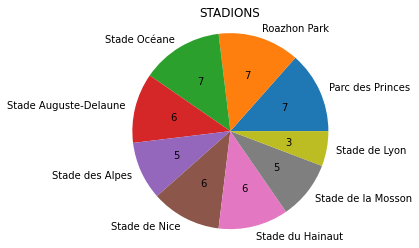

In [338]:
pie_datas = {}
for i in tabla['location']:
    if i not in pie_datas:
        pie_datas[i] = 1
    else:
        pie_datas[i] += 1 

%matplotlib inline
labels = pie_datas.keys()
sizes = []
for i in pie_datas.values():
    sizes.append(i)
total = sum(sizes)    
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct=lambda p:'{:.0f}'.format(p * total / 100))
ax.axis('equal')
ax.set_title('STADIONS')
plt.show()

**e)** (2 pont)<br>
Meccsekre és csapatokra vonatkozóan ábrázold szórásdiagramon a kapura rúgások számát (*attempts*) a labdabirtoklás (*possession*) függvényében, és színezd a pontokat a passzolási hatékonyság (*pass_accuracy*) szerint.<br>
> Tipp: használd a *seaborn* csomag [*scatterplot*](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) függvényét!

Értelmezd a látottakat, milyen következtetéseket tudsz levonni?

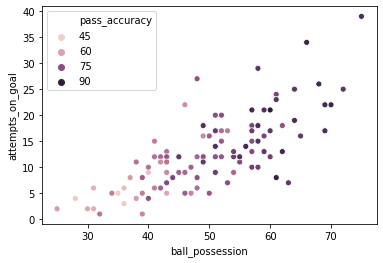

In [339]:
scatter_keys = ['home_team_statistics', 'away_team_statistics']
scatter_source = [[result[i] for i in scatter_keys] for result in vb]
elem_keys = ['country', 'attempts_on_goal', 'ball_possession', 'pass_accuracy']
scatter_source_list = []
for i in scatter_source:
    elem = [[],[]]
    for j in elem_keys:
        for k in i[0].keys():
            if j == k:
                elem[0].append(i[0][k])
        for l in i[1].keys():
            if j == l:
                elem[1].append(i[1][l])
    for m in elem:
        scatter_source_list.append(m)
scatter_source_list_keys = ['country', 'attempts_on_goal', 'ball_possession', 'pass_accuracy']
scatter_datas = pd.DataFrame(scatter_source_list, columns = scatter_source_list_keys)
sns.scatterplot(data=scatter_datas, x="ball_possession", y="attempts_on_goal", hue="pass_accuracy")

A kapura rúgások száma közel egyenesen arányosan függött a passzolási hatékonysággal szinte minden csapatnál.

---

## 2. feladat (HF2/2) (3 pont)

Javítsunk az órán látott modellen: döntési fa a banki adathalmazon.

In [340]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_graphviz

**a)** (1 pont)<br>
Az órán a *bank.csv* adathalmaz adatain osztályozási feladatot oldottunk meg kNN algoritmus segítségével. Az osztályozó nem teljesített jól. Ismételd meg az órai elemzést (Notebook02 alapján), de most használj döntési fát, a maximális mélységet állítsd 6-ra!<br>
> Tipp: használd a *tree.DecisionTreeClassifier* osztályozót!

Nézz utána, hogyan működik a használt döntési fa algoritmus!

In [341]:
bank_data = pd.read_csv("../Adatok/bank.csv", delimiter = " ", names = ['age', 'sex', 'region', 'income', 'married', 'children', 'car','save_acct', 'current_acct', 'mortgage', 'pep'])
numeric_data = bank_data.replace(['NO', 'YES', 'MALE', 'FEMALE'],[0,1,0,1])
numeric_data.head()
numeric_data = numeric_data.values

features = np.zeros((len(numeric_data),4))
numeric_data = np.append(numeric_data,features,1)
j = 2
for i in range(len(numeric_data)):
    if numeric_data[i][j] == 'INNER_CITY':
        numeric_data[i][11:15] = [1,0,0,0]
    if numeric_data[i][j] == 'TOWN':
         numeric_data[i][11:15] = [0,1,0,0]
    if numeric_data[i][j] == 'RURAL':
         numeric_data[i][11:15] = [0,0,1,0]
    if numeric_data[i][j] == 'SUBURBAN':
         numeric_data[i][11:15] = [0,0,0,1]        
numeric_data = np.delete(numeric_data, 2, 1)
numeric_data.astype(float)

bank_labels = numeric_data[:, 9].astype(int)
bank_attrs  = np.delete(numeric_data, 9, 1)

In [342]:
bank_features_train, bank_features_test, bank_labels_train, bank_labels_test = train_test_split(bank_attrs, bank_labels, test_size=0.33, random_state=42)

#TEACHING
clf = DecisionTreeClassifier(max_depth=6)
clf = clf.fit(bank_features_train, bank_labels_train)

#PREDICTION
predictions_test = clf.predict(bank_features_test)

#CONFUSION
cm = metrics.confusion_matrix(bank_labels_test, predictions_test)
print(cm)

#PRECISION, RECALL, ACCURACY
print("Precision: ", metrics.precision_score(bank_labels_test, predictions_test))
print("Recall: ", metrics.recall_score(bank_labels_test, predictions_test))
print("Accuracy: ", metrics.accuracy_score(bank_labels_test, predictions_test))

[[87 11]
 [16 84]]
Precision:  0.8842105263157894
Recall:  0.84
Accuracy:  0.8636363636363636


**b)** (1 pont)<br>
Most próbáld ki más paraméterbeállításokkal tanítani a fát! Rajzoltasd ki az előző feladatrészben és a most tanított döntési fa ROC görbéjét ugyanazon az ábrán (más színnel), az ábrán az *y=x* egyenest is rajzold be! Hogyan teljesít a döntési fa?

In [343]:
bank_features_train2, bank_features_test2, bank_labels_train2, bank_labels_test2 = train_test_split(bank_attrs, bank_labels, test_size=0.25, random_state=13)

#TEACHING
clf2 = DecisionTreeClassifier(max_depth=4)
clf2 = clf2.fit(bank_features_train2, bank_labels_train2)

#PREDICTION
predictions_test2 = clf2.predict(bank_features_test2)

#CONFUSION
cm2 = metrics.confusion_matrix(bank_labels_test2, predictions_test2)
print(cm2)

#PRECISION, RECALL, ACCURACY
print("Precision: ", metrics.precision_score(bank_labels_test2, predictions_test2))
print("Recall: ", metrics.recall_score(bank_labels_test2, predictions_test2))
print("Accuracy: ", metrics.accuracy_score(bank_labels_test2, predictions_test2))

[[70 10]
 [14 56]]
Precision:  0.8484848484848485
Recall:  0.8
Accuracy:  0.84


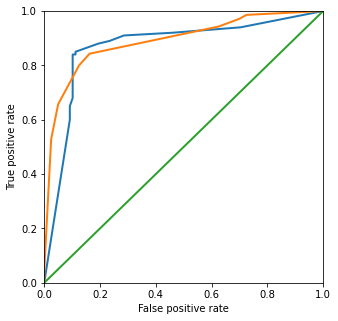

In [344]:
tree_prob = clf.predict_proba(bank_features_test)
fpr, tpr, thresholds = metrics.roc_curve(bank_labels_test, tree_prob[:,1], pos_label=1, sample_weight=None)

tree_prob2 = clf2.predict_proba(bank_features_test2)
fpr2, tpr2, thresholds2 = metrics.roc_curve(bank_labels_test2, tree_prob2[:,1], pos_label=1, sample_weight=None)

x = [0, 1]
y = [0, 1]

%matplotlib inline
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, linewidth=2.0)
plt.plot(fpr2, tpr2, linewidth=2.0)
plt.plot(x, y, linewidth=2.0)


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])

plt.show()

In [345]:
print("2.a rész: ", metrics.roc_auc_score(bank_labels_test,tree_prob[:,1], average='macro', sample_weight=None))
print("2.b rész: ", metrics.roc_auc_score(bank_labels_test2,tree_prob2[:,1], average='macro', sample_weight=None))

2.a rész:  0.8690816326530613
2.b rész:  0.8896428571428572


Mindkettő feladatrészben jól teljesít a döntési fa.

**c)** (1 pont)<br>
A döntési fa kirajzolása és értelmezése
* Az a) feladatrészben betanított döntési fát vizualizáld a *tree.export_graphviz* függvény segítségével. A fa megjelenítéséhez használd a *tree.plot_tree* függvényt!

* Mi szerint vág először a fa? Mik a gyakori vágóattribútumok? Egy-két mondatban értelmezd a látottakat!

In [346]:
print(tree.export_graphviz(clf))

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 50051.701\ngini = 0.491\nsamples = 402\nvalue = [228, 174]"] ;
1 [label="X[4] <= 1.5\ngini = 0.477\nsamples = 369\nvalue = [224, 145]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[4] <= 0.5\ngini = 0.498\nsamples = 246\nvalue = [131, 115]"] ;
1 -> 2 ;
3 [label="X[3] <= 0.5\ngini = 0.432\nsamples = 168\nvalue = [115, 53]"] ;
2 -> 3 ;
4 [label="X[8] <= 0.5\ngini = 0.467\nsamples = 43\nvalue = [16, 27]"] ;
3 -> 4 ;
5 [label="X[0] <= 36.5\ngini = 0.142\nsamples = 26\nvalue = [2, 24]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 12\nvalue = [0, 12]"] ;
5 -> 6 ;
7 [label="gini = 0.245\nsamples = 14\nvalue = [2, 12]"] ;
5 -> 7 ;
8 [label="X[6] <= 0.5\ngini = 0.291\nsamples = 17\nvalue = [14, 3]"] ;
4 -> 8 ;
9 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
8 -> 9 ;
10 [label="gini = 0.0\nsamples = 14\nvalue = [14, 0]"] ;
8 -> 10 ;
11 [label="X[6] <= 0.5\ngini = 0.329\nsamples = 125\nvalue = [99, 26]"] ;
3 -

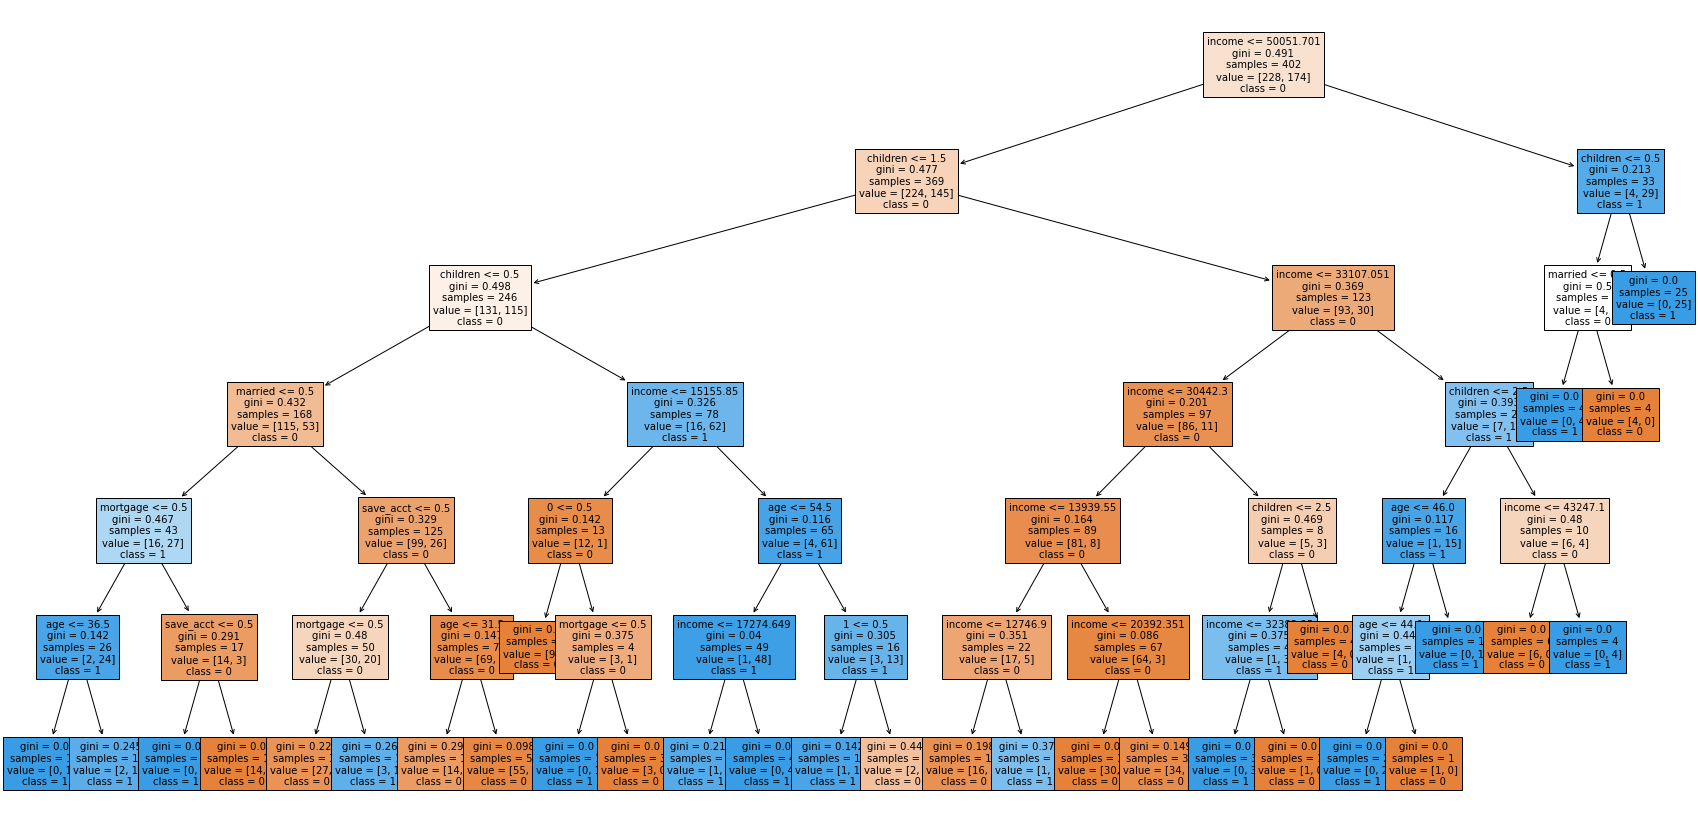

In [347]:
feature_cols = ['age', 'sex', 'income', 'married', 'children', 'car','save_acct', 'current_acct', 'mortgage', 'pep', '0','1','0','1']
fig = plt.figure(figsize=(30,15))
tree.plot_tree(clf, feature_names=feature_cols, class_names=['0','1'], filled=True, fontsize = 10)
plt.show()

A fa először az income alapján vág. A gyakori vágóattribútumok az income, a children, a married, a save_acct és az age, ezek közül is a leggyakoribb az income.

---

## 3. feladat (HF2/3) (6 pont)

Borban az igazság? Ebben a feladatban különböző borok minőségét kell prediktálnunk! Meg tudja jósolni egy borász pusztán a bor kémiai tulajdonságai alapján, hogy a borát minőségi bornak fogja-e tartani a szakma? 🍷

In [348]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

**a)** (1 pont)<br>
A [UCI adattárházban](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) található adatok alapján fogunk vizsgálódni. Ez több ezer észak-portugáliai bor 11 kémiai tulajdonságát (pl. cukortartalom, pH, alkoholtartalom, stb.) és egy a borokra vonatkozó 10-es skálán mért minőségi mutatót tartalmaz.

* Töltsd be a **vörös**borok adatait egy pandas dataframe-be [az adattárházból](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/). Az adatot közvetlenül az internetről, a fájl saját gépre való letöltése nélkül töltsd be! A *quality* oszlop lesz a célváltozó (label), a többi oszlop pedig magyarázóváltozó (feature).
* Bináris osztályozási feladatként tekintünk a továbbiakban a problémára, ezért a célváltozó értékét definiáld át: legyen az értéke 0, ha *quality $<$ 6.5* (rossz borok), és legyen az értéke 1, ha *quality $\geq$ 6.5* (jó borok). Hozz létre külön *numpy array*-ket a célváltozók és a többi attribútum tárolására!

In [349]:
redwine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';', quotechar='.', header = 0)
redwine_num_data = redwine_data.values

for i in range(len(redwine_num_data)):
    if redwine_num_data[i][11] < 6.5:
        redwine_num_data[i][11] = 0
    else:
        redwine_num_data[i][11] = 1

redwine_num_data.astype(float)
redwine_labels = redwine_num_data[:, 11].astype(int)
redwine_features = np.delete(redwine_num_data, 11, 1)

**b)** (2 pont)<br>
Osztályozás, keresztvalidálás
* Használj *k*NN algoritmust az osztályozásra! Tízszeres keresztvalidációval állapítsd meg, hogy milyen *k* érték esetén lesz optimális az osztályozás F-mértéke! Vizsgáld a *k* értékét egy értelmes intervallumon!<br>
> Tipp: használd a *model_selection.cross_val_score* függvényt *scoring = 'f1'* beállítással!

* Ábrázold *k* függvényében a keresztvalidációs technikával kapott F-mértékek boxplotját!<br>
> Tipp: használd a *seaborn* csomag *boxplot* függvényét!

In [350]:
k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]
F = []
for i in k:
    kNC = KNeighborsClassifier(n_neighbors = i, metric = "euclidean")
    f = cross_val_score(kNC, redwine_features, redwine_labels, cv=10, scoring='f1')
    F.append(f)

In [351]:
F_mean = []
for j in F:
    F_mean.append(j.mean())
index = F_mean.index(max(F_mean))
print(k[index])

1


A k=1 érték esetén lesz optimális az osztályozás F-mértéke.

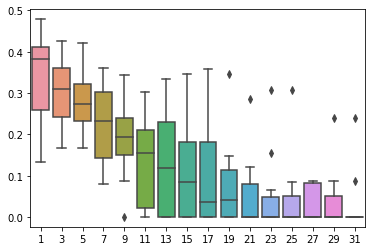

In [352]:
ax = sns.boxplot(x = k, y = F)

**c)** (2 pont)<br>
Használj döntési fát az osztályozásra! Végezd el az előző feladatrészben leírt elemzést, most a vizsgált paraméternek a döntési fa maximális mélységét válaszd!

In [353]:
d = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Fa = []
for i in d:
    DTC = DecisionTreeClassifier(max_depth=i)
    f = cross_val_score(DTC, redwine_features, redwine_labels, cv=10, scoring='f1')
    Fa.append(f)

In [354]:
Fa_mean = []
for j in Fa:
    Fa_mean.append(j.mean())
index = Fa_mean.index(max(Fa_mean))
print(d[index])

4


A max_depth=4 érték esetén lesz optimális az osztályozás F-mértéke.

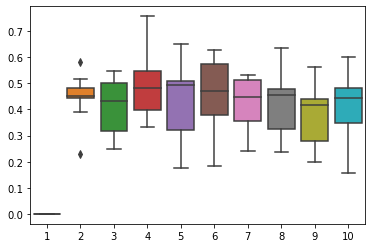

In [355]:
ax = sns.boxplot(x = d, y = Fa)

**d)** (1 pont)<br>
Mit tapasztaltál az elemzés során? Hogyan teljesítenek az osztályozók? Melyiket használnád?

In [356]:
kredwine_features_train, kredwine_features_test, kredwine_labels_train, kredwine_labels_test = train_test_split(redwine_attrs, redwine_labels, test_size=0.33, random_state=42)

kkNC = KNeighborsClassifier(n_neighbors = 1, metric = "euclidean")
kkNC = kkNC.fit(redwine_features_train, redwine_labels_train)

kkNC_prob = kkNC.predict_proba(kredwine_features_test)
print(metrics.roc_auc_score(kredwine_labels_test,kkNC_prob[:,1], average='macro', sample_weight=None))

0.7166613873930947


In [357]:
fredwine_features_train, fredwine_features_test, fredwine_labels_train, fredwine_labels_test = train_test_split(redwine_attrs, redwine_labels, test_size=0.33, random_state=42)

fDTC = DecisionTreeClassifier(max_depth=4)
fDTC = fDTC.fit(fredwine_features_train, fredwine_labels_train)

fDTC_prob = fDTC.predict_proba(fredwine_features_test)
print(metrics.roc_auc_score(fredwine_labels_test,fDTC_prob[:,1], average='macro', sample_weight=None))

0.7820139948743052


A b és c feladatrészben látottak és a fentebb elvégzett optimális értékekkel való tesztelés során látható, hogy mind a két osztályozó egész jól teljesített. Én a döntési fásat választanám, mert az valamennyivel jobban teljesített.

---